<a href="https://colab.research.google.com/github/Aniket-23/Deep-Learning/blob/master/text_classification_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network

If the input data were a sequence, the feedforward neural net would not really do a good job of picking it up. It is because each node of each layer of a feedforward neural net would evaluate those values as if they were independent variables.

That's where Recurrent Neural Network comes into the picture. For a given time t, it takes the data x(t) and compiles it through the model keeping in mind, the information gained while processing x(t-1). But sometimes it encounters problems such as exploding gradients and vanishing gradients, that come by compiling the same data again and again and again.
Encounter these issues, there are GRU(Gated Recurrent Unit) and LSTM(Long-Short Term Memory).

In GRU, there is more parameter inside a neuron itself that develops and trains the model thoroughly rather than trying to directly sum up some weights. It has 2 gates (advanced topics).

LSTM is something very similar to GRU, but instead of having 2 gates, it has 3.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df = pd.read_csv('dataset/wine-reviews.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


We shall only use the columns that we deem necessary.

In [ ]:
df = pd.read_csv('dataset/wine-reviews.csv', usecols = ['country', 'description', 'points', 'price', 'variety', 'winery'])
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.isna().sum() #checking if there are any null values

country          63
description       0
points            0
price          8996
variety           1
winery            0
dtype: int64

There are a few NaN values in the column `country` and a lot of those in the column `price`. There's only one NaN value in the column `variety`.

In [ ]:
df.dropna(subset = ['description', 'points']) #  to drop rows where either the 'description' or 'points' column contains missing values
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.isna().sum()

country          63
description       0
points            0
price          8996
variety           1
winery            0
dtype: int64

No change, since we dropped values from the two columns that do not have any NaN values. But we tried to drop them regardless, just to be safe.

Now, we will plot the `points` column to see the distribution of the points

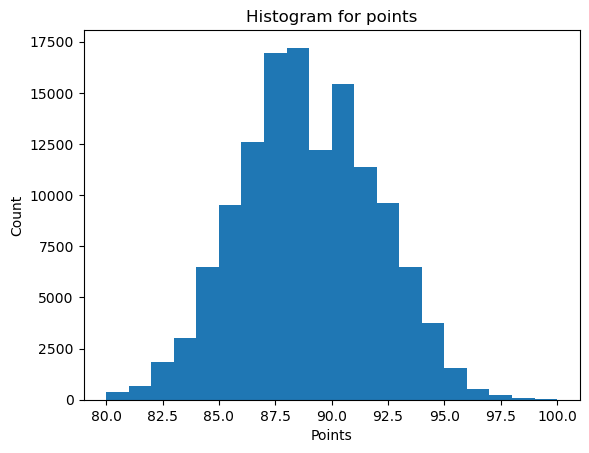

In [ ]:
plt.hist(df.points, bins=20)
plt.title("Histogram for points")
plt.ylabel("Count")
plt.xlabel("Points")
plt.show()

From the above graph, we can see that the range for `points` lie in between 80 and 100.
So, let's try to classify(split) these reviews as below 90 points(low) and above 90 points(high).

In [ ]:
df["label"] = (df.points >= 90).astype(int)
df

,country,description,points,price,variety,winery,label
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos,0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian,0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks,0
...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation,1
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser,1
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss,1


In [ ]:
df = df[["description", "label"]]
df

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,1
129967,Citation is given as much as a decade of bottl...,1
129968,Well-drained gravel soil gives this wine its c...,1
129969,"A dry style of Pinot Gris, this is crisp with ...",1


In [ ]:
# Lets now split our dataset into training, validation and testing dataset
train, val, test = np.split(df.sample(frac = 1), [int(0.8*len(df)), int(0.9*len(df))])

In [ ]:
len(train), len(val), len(test)

(103976, 12997, 12998)

Next up, we will write a function that will convert our testing, validation and training dataset DataFrame into a tf.data.Dataset that will shuffle and batch the data. Or, we can simply say that it converts pandas DataFrame to TensorFlow Dataset.

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df["description"]
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(df))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

#### Description for the code given in the cell above:
*This code block has been copied from the official documentation provided by TensorFlow in their websites. Hence, it needs some explaination*

1. `df = dataframe.copy():` Creates a copy of the input DataFrame to avoid modifying the original data.
2. `labels = df.pop('label'):` Removes the `label` column from the DataFrame and assigns it to the variable `labels`.
3. `df = df["description"]:` Selects only the `description` column from the DataFrame and assigns it back to the `df` variable.
4. `ds = tf.data.Dataset.from_tensor_slices(df, labels):` Creates a TensorFlow Dataset from the `df` (description) and `labels`. The `from_tensor_slices()` function creates a dataset with each element being a tuple of corresponding elements from the input tensors (in this case, `df` and `labels`).
5. `if shuffle: ds = ds.shuffle(buffer_size=len(dataframe)):` If the `shuffle` parameter is set to True, shuffles the elements of the dataset. The `buffer_size` specifies the number of elements from which the next element will be randomly sampled.
6. `ds = ds.batch(batch_size):` Batches the dataset into mini-batches of size `batch_size`. This step groups consecutive elements from the dataset into batches.
7. `ds = ds.prefetch(tf.data.AUTOTUNE):` Pre-fetches data batches, allowing the data to be loaded asynchronously while the model is training on the current batch. The value `tf.data.AUTOTUNE` dynamically adjusts the prefetch buffer size based on available system memory to optimize performance.

In [ ]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [ ]:
train_data[0]

TypeError: '_PrefetchDataset' object is not subscriptable

The train_data cannot be printed because it is a TensorFlow dataset that cannot be printed (for some reasons). To see this data, we can convert it into a list and then see it.

In [ ]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'This pretty Extra Dry Prosecco (with a playful touch of sweetness) opens with bright aromas of peach, honey and jasmine and segues into a soft, creamy mouthfeel.',
        b'The current downturn in demand for both grapes and expensive wines only helps A to Z; there is more good fruit to purchase, and plenty of demand at a $12 price point. This new Pinot Gris is fresh and racy, with a mineral-driven acidity underlying the clean fruit, tasting of pears and pear skin.',
        b'Crisp and flavorful, a delicious Chardonnay designed for rich fare like scallops or shrimp in saffron, coconut milk and butter sauce. The flavors of pineapples, mangoes, nectarines, peaches and smoky oak are complex and have a honey-sweet finish.',
        ...,
        b'Some sandalwood incense elevates the nose. In the mouth there is little varietal character, though the Sangiovese is unblended. Tart, chewy, acidic and light, with plenty of acid.',
     

In the output above, we can see that we have the tensors for all the descriptions and their corresponding labels.

In [ ]:
len(list(train_data)[0][0]), len(list(train_data)[0][1])

(1024, 1024)

We have imported something called as tensorflow_hub in the 1st cell block. **TensorFlow Hub** is a repository of Machine Learning models. These models are ready to use, that just need some fine tuning to make it work in our projects. Hence we are going to use it for text classification.

**Reminder :** Computers do not understand texts that well. What they do understand is numbers, mostly binaries. So, in our case we need to model our texts (description) into numbers for our machine to understand it, and that's where embedding comes into play.

The embedding that we will use is **nnlm-en-dim50** which is used for text embedding. It is a Token based text embedding trained on English Google News 7B corpus. It is a saved model in TensorFlow Hub used for text embedding.
*Link:* https://tfhub.dev/google/nnlm-en-dim50/2

# Embedding + Model

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

#### Description for the code above:
1. `embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"`: This line defines the URL or path to the pre-trained word embedding model you want to use. In this case, it's the `nnlm-en-dim50` model provided by Google. It represents a 50-dimensional word embedding trained on English text.
2. `hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)`: This line creates a KerasLayer using the TensorFlow Hub URL.  The `hub.KerasLayer` is a convenient way to load and use pre-trained models from TensorFlow Hub in a Keras model.

(a). `embedding`: The URL or path to the pre-trained model.

(b). `dtype=tf.string`: Specifies the input data type of the layer. In this case, it expects strings as input.

(c). `trainable=True`: Indicates whether the embedding layer should be trainable or not. By setting it to `True`, the weights of the embedding layer will be updated during training.

 By using the `hub.KerasLayer`, you can easily incorporate the pre-trained word embeddings into your own Keras model by connecting it as the first layer. The layer will take text input and output the corresponding word embeddings based on the pre-trained model.

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.516808  , -0.23449565,  0.26683867, ..., -0.08900933,
        -0.06073478,  0.00511104],
       [ 0.6053126 , -0.05028325, -0.10285438, ..., -0.20563294,
        -0.08465228, -0.16313022],
       [ 0.35332438, -0.11170206,  0.13079605, ..., -0.23406036,
        -0.08427208,  0.10434351],
       ...,
       [ 0.36813903,  0.05223183,  0.12846713, ..., -0.11695352,
        -0.00501289, -0.01595003],
       [ 0.6423655 , -0.15316866, -0.18809181, ...,  0.23848629,
        -0.1179915 , -0.0249131 ],
       [ 0.37326708, -0.19031796, -0.14556217, ..., -0.13188013,
        -0.21815908, -0.04337234]], dtype=float32)>

The output that we get here is basically, all the texts that we had, was projected into a vector of length 50. Which is what embedding is: transforming a text into a vector of numbers that our model can understand.

In [ ]:
# another way to create a model
model = tf.keras.Sequential()
model.add(hub_layer) #1st layer is set to be the hub layer for transforming the text to numeric value
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 5s 31ms/step - loss: 0.7102 - accuracy: 0.3885


[0.710213840007782, 0.38846465945243835]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 1s 32ms/step - loss: 0.7096 - accuracy: 0.3929


[0.7096197605133057, 0.3929368257522583]

The accuracy and the loss for the model is dissapointing, in the least. Let's train our model and see the results

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 108s 1s/step - loss: 0.5982 - accuracy: 0.6598 - val_loss: 0.4463 - val_accuracy: 0.7884
Epoch 2/10
102/102 [==============================] - 101s 994ms/step - loss: 0.3847 - accuracy: 0.8229 - val_loss: 0.3838 - val_accuracy: 0.8247
Epoch 3/10
102/102 [==============================] - 101s 994ms/step - loss: 0.3345 - accuracy: 0.8512 - val_loss: 0.3768 - val_accuracy: 0.8262
Epoch 4/10
102/102 [==============================] - 101s 987ms/step - loss: 0.3088 - accuracy: 0.8662 - val_loss: 0.3767 - val_accuracy: 0.8287
Epoch 5/10
102/102 [==============================] - 101s 990ms/step - loss: 0.2895 - accuracy: 0.8762 - val_loss: 0.3818 - val_accuracy: 0.8280
Epoch 6/10
102/102 [==============================] - 102s 995ms/step - loss: 0.2740 - accuracy: 0.8838 - val_loss: 0.3834 - val_accuracy: 0.8313
Epoch 7/10
102/102 [==============================] - 101s 988ms/step - loss: 0.2601 - accuracy: 0.8913 - val_loss: 0.3878 - va

From our output above, we can see that every other value is progressing perfectly over time, except our validation loss. It starts to decrease at first, but later on it begins to increase, where as the loss in our training data is decreasing over time. This happens because of *overfitting*. It means that our model is behaving perfectly with the training data, but it is generalizing some parameters of our validation data. We can see that by plotting a graph of history of our trained model.

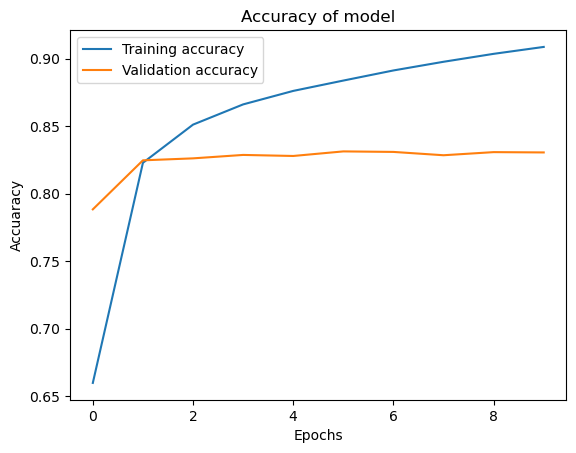

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy of model')
plt.ylabel('Accuaracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

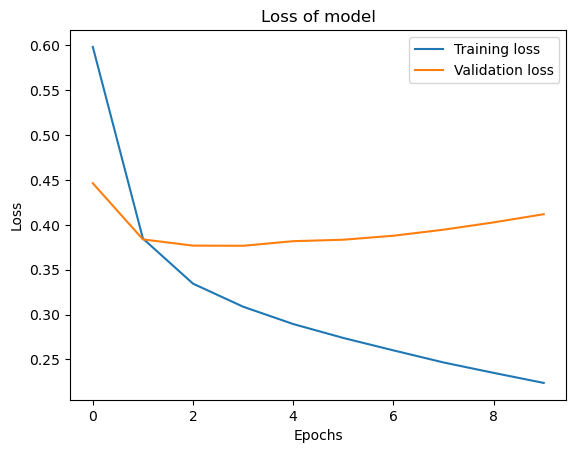

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss of model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

So, basically this means that our model is incapable of generalizing, i.e., our model is taking in account some of the nodes that aren't working, but still, taken into account, just because they are present in the model. This can be fixed by adding `Dropout` between layers. What `Dropout` will do is drop those nodes or try to figure out a way to how to work around them. Thus, it helps our model generalize a little bit by adding a little bit or randomness in there.

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 11s 104ms/step - loss: 0.6907 - accuracy: 0.5990


[0.6906875371932983, 0.599032461643219]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 2s 116ms/step - loss: 0.6900 - accuracy: 0.5985


[0.6899901032447815, 0.5985227227210999]

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 101s 985ms/step - loss: 0.5834 - accuracy: 0.6646 - val_loss: 0.4370 - val_accuracy: 0.8131
Epoch 2/10
102/102 [==============================] - 96s 941ms/step - loss: 0.3870 - accuracy: 0.8371 - val_loss: 0.3887 - val_accuracy: 0.8237
Epoch 3/10
102/102 [==============================] - 100s 983ms/step - loss: 0.3248 - accuracy: 0.8696 - val_loss: 0.3960 - val_accuracy: 0.8223
Epoch 4/10
102/102 [==============================] - 101s 987ms/step - loss: 0.2986 - accuracy: 0.8826 - val_loss: 0.4111 - val_accuracy: 0.8226
Epoch 5/10
102/102 [==============================] - 101s 991ms/step - loss: 0.2837 - accuracy: 0.8896 - val_loss: 0.4249 - val_accuracy: 0.8223
Epoch 6/10
102/102 [==============================] - 101s 991ms/step - loss: 0.2702 - accuracy: 0.8946 - val_loss: 0.4282 - val_accuracy: 0.8198
Epoch 7/10
102/102 [==============================] - 101s 988ms/step - loss: 0.2587 - accuracy: 0.8998 - val_loss: 0.4496 - 

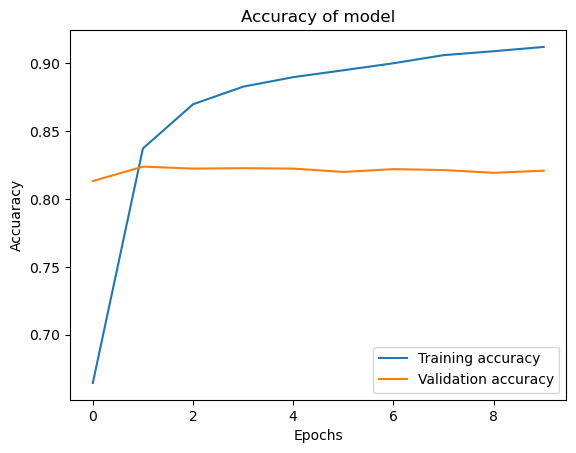

In [ ]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.title('Accuracy of model')
plt.ylabel('Accuaracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

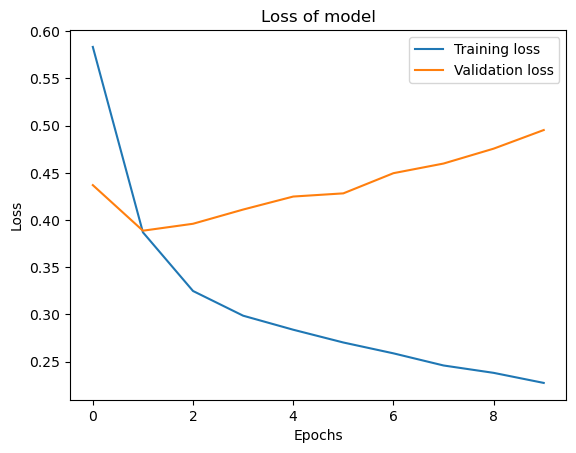

In [ ]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('Loss of model')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

There are not much variation among the two results that we obtained. So the issue is not of overfitting but something else. Anyways, the accuracy and loss that we have gathered is good enough for us to proceed to evaluate it to our testing data.

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 2s 113ms/step - loss: 0.4937 - accuracy: 0.8225


[0.49370473623275757, 0.8225111365318298]

The result is pretty good. But let's check out LSTM as well

# LSTM

In [ ]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

1. `encoder = tf.keras.layers.TextVectorization(max_tokens=2000)`: This line creates an instance of the TextVectorization layer with a maximum vocabulary size of 2000. The `TextVectorization` layer is responsible for tokenizing and vectorizing the text data.
2. `encoder.adapt(train_data.map(lambda text, label: text))`: This line adapts the TextVectorization layer to the training data. It processes the text data and builds the vocabulary based on the tokens encountered in the training set. The map function is used to extract the text input from the train_data dataset.
By calling `adapt()` on the `TextVectorization` layer with the training data, the layer learns the vocabulary and other configuration parameters based on the actual data. This ensures that the layer is properly set up to preprocess and vectorize the text data in subsequent steps

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

`vocab = np.array(encoder.get_vocabulary())`: This line calls the `get_vocabulary()` method on the `TextVectorization` layer (encoder) to retrieve the vocabulary. The vocabulary is returned as a list of tokens.
By accessing the `vocab` array, you can examine the tokens present in the vocabulary.

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = 32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

1. `encoder`: The `encoder` is a `TextVectorization` layer that converts text data into numerical representations.
2. `tf.keras.layers.Embedding`: This layer creates word embeddings for the input text. It takes the vocabulary size `(len(encoder.get_vocabulary()))` as the input dimension and outputs word embeddings of size 32. The `mask_zero=True` parameter masks padded values in the input sequences. It is used to handle variable-length sequences by masking padded values in the input.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

102/102 [==============================] - 28s 245ms/step - loss: 0.6927 - accuracy: 0.5688


[0.6927056908607483, 0.5688043236732483]

In [ ]:
model.evaluate(valid_data)

13/13 [==============================] - 2s 170ms/step - loss: 0.6927 - accuracy: 0.5653


[0.6927191019058228, 0.5652843117713928]

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/10
102/102 [==============================] - 50s 436ms/step - loss: 0.5573 - accuracy: 0.7042 - val_loss: 0.3940 - val_accuracy: 0.8175
Epoch 2/10
102/102 [==============================] - 43s 418ms/step - loss: 0.3702 - accuracy: 0.8350 - val_loss: 0.3651 - val_accuracy: 0.8327
Epoch 3/10
102/102 [==============================] - 44s 433ms/step - loss: 0.3470 - accuracy: 0.8450 - val_loss: 0.3612 - val_accuracy: 0.8325
Epoch 4/10
102/102 [==============================] - 43s 423ms/step - loss: 0.3401 - accuracy: 0.8481 - val_loss: 0.3572 - val_accuracy: 0.8367
Epoch 5/10
102/102 [==============================] - 45s 440ms/step - loss: 0.3351 - accuracy: 0.8499 - val_loss: 0.3604 - val_accuracy: 0.8363
Epoch 6/10
102/102 [==============================] - 45s 438ms/step - loss: 0.3311 - accuracy: 0.8517 - val_loss: 0.3575 - val_accuracy: 0.8351
Epoch 7/10
102/102 [==============================] - 46s 443ms/step - loss: 0.3314 - accuracy: 0.8516 - val_loss: 0.3582 - val_ac

LSTM yeilds pretty good results compared to before. The output for both training and validation data is quite good. Hence, we would choose this for furthur processes. Let's finally evaluate it against the testing dataset.

In [ ]:
model.evaluate(test_data)

13/13 [==============================] - 2s 164ms/step - loss: 0.3455 - accuracy: 0.8461


[0.34554967284202576, 0.8461301922798157]